In [36]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

In [37]:
articles = pd.read_csv('ukraine_textcontain_after_new.csv')
authors = pd.read_csv('ukraine_textcontain_after_new_authors.csv')

In [38]:
articles

article_title                 author  \
0    US can no longer be perfunctory toward Guterre...        By Global Times   
1    Healthy and stable China-S.Korea ties depend o...       By Wang Junsheng   
2    China’s power in the world, economically and p...        By Global Times   
3    Europe faces ‘coldest’ winter as energy crisis...            By Qi Xijia   
4    Severe drought in Europe ‘further expanding an...                 By AFP   
..                                                 ...                    ...   
485  US policy of ‘technological apartheid’ could l...       By William Jones   
486  US behind global grain crises: Chinese FM spok...        By Global Times   
487  ‘No longer US’ backyard,’ Latin America sends ...  By GT staff reporters   
488  Chinese envoy warns against providing weapons ...              By Xinhua   
489  Ukraine, Moldova agree to facilitate border cr...              By Xinhua   

                       published_time  \
0    Published: Aug 22, 2022 11:58 PM   
1    Published: Aug 23, 2022 06:27 PM   
2    Published: Aug 23, 2022 06:44 PM   
3    Published: Aug 23, 2022 08:16 PM   
4    Published: Aug 23, 2022 08:27 PM   
..                                ...   
485  Published: Jun 06, 2022 11:23 PM   
486  Published: Jun 07, 2022 12:47 AM   
487  Published: Jun 07, 2022 01:00 AM   
488  Published: Jun 07, 2022 07:13 AM   
489  Published: Jun 07, 2022 07:15 AM   

                                          article_text article_category_one  \
0    United Nations Secretary-General Antonio Guter...              OPINION   
1    Illustration: Chen Xia/GTWednesday marks the 3...              OPINION   
2    Tower Bridge, London, the UK Photo:VCGEditor's...              OPINION   
3    A coal-fired power plant operated by German en...               SOURCE   
4    A severe drought hitting swathes of Europe is ...                WORLD   
..                                                 ...                  ...   
485  Illustration: Tang Tengfei/Global TimesA New Y...              OPINION   
486  Zhao Lijian Photo: VCG  Each global grain cris...               SOURCE   
487  Mexico's President Andres Manuel Lopez Obrador...                WORLD   
488  A Chinese envoy on Monday warned against const...                CHINA   
489  The customs agencies of Ukraine and Moldova ha...                WORLD   

    article_category_two                                picture_description  
0              EDITORIAL  United Nations Secretary-General Antonio Guter...  
1              VIEWPOINT                          Illustration: Chen Xia/GT  
2              VIEWPOINT             Tower Bridge, London, the UK Photo:VCG  
3                ECONOMY  A coal-fired power plant operated by German en...  
4                 EUROPE                      Picture description not found  
..                   ...                                                ...  
485            VIEWPOINT            Illustration: Tang Tengfei/Global Times  
486              ECONOMY                      Picture description not found  
487             AMERICAS                      Picture description not found  
488            DIPLOMACY                      Picture description not found  
489        CROSS-BORDERS                      Picture description not found  

[490 rows x 7 columns]

In [39]:
# date published
#remoe where published time = published time not found

articles = articles.drop(articles[articles['published_time'] == 'Published time not found'].index)

articles['published_time'] = articles['published_time'].str[11:]
articles['published_time'] = articles['published_time'].str[:12]
#to date mmm dd, yyyy
articles['published_time'] = pd.to_datetime(articles['published_time'], format='%b %d, %Y')
articles

article_title                 author  \
0    US can no longer be perfunctory toward Guterre...        By Global Times   
1    Healthy and stable China-S.Korea ties depend o...       By Wang Junsheng   
2    China’s power in the world, economically and p...        By Global Times   
3    Europe faces ‘coldest’ winter as energy crisis...            By Qi Xijia   
4    Severe drought in Europe ‘further expanding an...                 By AFP   
..                                                 ...                    ...   
485  US policy of ‘technological apartheid’ could l...       By William Jones   
486  US behind global grain crises: Chinese FM spok...        By Global Times   
487  ‘No longer US’ backyard,’ Latin America sends ...  By GT staff reporters   
488  Chinese envoy warns against providing weapons ...              By Xinhua   
489  Ukraine, Moldova agree to facilitate border cr...              By Xinhua   

    published_time                                       article_text  \
0       2022-08-22  United Nations Secretary-General Antonio Guter...   
1       2022-08-23  Illustration: Chen Xia/GTWednesday marks the 3...   
2       2022-08-23  Tower Bridge, London, the UK Photo:VCGEditor's...   
3       2022-08-23  A coal-fired power plant operated by German en...   
4       2022-08-23  A severe drought hitting swathes of Europe is ...   
..             ...                                                ...   
485     2022-06-06  Illustration: Tang Tengfei/Global TimesA New Y...   
486     2022-06-07  Zhao Lijian Photo: VCG  Each global grain cris...   
487     2022-06-07  Mexico's President Andres Manuel Lopez Obrador...   
488     2022-06-07  A Chinese envoy on Monday warned against const...   
489     2022-06-07  The customs agencies of Ukraine and Moldova ha...   

    article_category_one article_category_two  \
0                OPINION            EDITORIAL   
1                OPINION            VIEWPOINT   
2                OPINION            VIEWPOINT   
3                 SOURCE              ECONOMY   
4                  WORLD               EUROPE   
..                   ...                  ...   
485              OPINION            VIEWPOINT   
486               SOURCE              ECONOMY   
487                WORLD             AMERICAS   
488                CHINA            DIPLOMACY   
489                WORLD        CROSS-BORDERS   

                                   picture_description  
0    United Nations Secretary-General Antonio Guter...  
1                            Illustration: Chen Xia/GT  
2               Tower Bridge, London, the UK Photo:VCG  
3    A coal-fired power plant operated by German en...  
4                        Picture description not found  
..                                                 ...  
485            Illustration: Tang Tengfei/Global Times  
486                      Picture description not found  
487                      Picture description not found  
488                      Picture description not found  
489                      Picture description not found  

[489 rows x 7 columns]

In [40]:
#stats published time
articles['author'].unique()

array(['By Global Times', 'By Wang Junsheng', 'By Qi Xijia', 'By AFP',
       'Zhang Hui', 'By Xinhua', 'By Reuters', 'Xu Keyue',
       'Chen Qingqing', 'By Zhang Han', 'By Mark Blacklock',
       'By GT staff reporters', 'By Chinese Embassy in the United States',
       'By Franz Gayl', 'By Zhang Changyue', 'By Agencies', 'By Wang Yi',
       'By Herman Tiu Laurel', 'By Wen Sheng', 'By IC', 'Liu Xin',
       'By Long Xingchun', 'By Xinhua – Reuters', 'By Toumert AI',
       'By Lin Xiaoyi', 'By Gloabl Times', 'By Lu Xue', 'By Ma Hanzhi',
       'By Leng Shumei', 'By Zhang Han in Xi’an', 'By Lu Shaye',
       'By Song Wei', 'Wang Wen', 'Andrey Kortunov', 'By VCG',
       'Bradley Blankenship', 'By Ma Jingjing and Qi Xijia', 'Yang Sheng',
       'By Clifford A Kiracofe', 'By Xie Wenting', 'Zhao Yusha',
       'Chu Daye', 'By Liu Zongyi', 'By Lin Songtian', 'Wang Qi',
       'By Song Luzheng', 'By Xia Wenxin', 'By Fan Anqi and Wan Hengyi',
       'By Kevin Rudd', 'Xie Jun', 'Wang Wenwen

In [41]:
# celan authors
articles['author'] = articles['author'].apply(lambda x: x[3:] if x.startswith("By ") else x)
articles

article_title              author  \
0    US can no longer be perfunctory toward Guterre...        Global Times   
1    Healthy and stable China-S.Korea ties depend o...       Wang Junsheng   
2    China’s power in the world, economically and p...        Global Times   
3    Europe faces ‘coldest’ winter as energy crisis...            Qi Xijia   
4    Severe drought in Europe ‘further expanding an...                 AFP   
..                                                 ...                 ...   
485  US policy of ‘technological apartheid’ could l...       William Jones   
486  US behind global grain crises: Chinese FM spok...        Global Times   
487  ‘No longer US’ backyard,’ Latin America sends ...  GT staff reporters   
488  Chinese envoy warns against providing weapons ...              Xinhua   
489  Ukraine, Moldova agree to facilitate border cr...              Xinhua   

    published_time                                       article_text  \
0       2022-08-22  United Nations Secretary-General Antonio Guter...   
1       2022-08-23  Illustration: Chen Xia/GTWednesday marks the 3...   
2       2022-08-23  Tower Bridge, London, the UK Photo:VCGEditor's...   
3       2022-08-23  A coal-fired power plant operated by German en...   
4       2022-08-23  A severe drought hitting swathes of Europe is ...   
..             ...                                                ...   
485     2022-06-06  Illustration: Tang Tengfei/Global TimesA New Y...   
486     2022-06-07  Zhao Lijian Photo: VCG  Each global grain cris...   
487     2022-06-07  Mexico's President Andres Manuel Lopez Obrador...   
488     2022-06-07  A Chinese envoy on Monday warned against const...   
489     2022-06-07  The customs agencies of Ukraine and Moldova ha...   

    article_category_one article_category_two  \
0                OPINION            EDITORIAL   
1                OPINION            VIEWPOINT   
2                OPINION            VIEWPOINT   
3                 SOURCE              ECONOMY   
4                  WORLD               EUROPE   
..                   ...                  ...   
485              OPINION            VIEWPOINT   
486               SOURCE              ECONOMY   
487                WORLD             AMERICAS   
488                CHINA            DIPLOMACY   
489                WORLD        CROSS-BORDERS   

                                   picture_description  
0    United Nations Secretary-General Antonio Guter...  
1                            Illustration: Chen Xia/GT  
2               Tower Bridge, London, the UK Photo:VCG  
3    A coal-fired power plant operated by German en...  
4                        Picture description not found  
..                                                 ...  
485            Illustration: Tang Tengfei/Global Times  
486                      Picture description not found  
487                      Picture description not found  
488                      Picture description not found  
489                      Picture description not found  

[489 rows x 7 columns]

In [42]:
articles['article_text'] = articles.apply(lambda x: x['article_text'].replace(str(x['picture_description']), ''), axis=1)
articles

article_title              author  \
0    US can no longer be perfunctory toward Guterre...        Global Times   
1    Healthy and stable China-S.Korea ties depend o...       Wang Junsheng   
2    China’s power in the world, economically and p...        Global Times   
3    Europe faces ‘coldest’ winter as energy crisis...            Qi Xijia   
4    Severe drought in Europe ‘further expanding an...                 AFP   
..                                                 ...                 ...   
485  US policy of ‘technological apartheid’ could l...       William Jones   
486  US behind global grain crises: Chinese FM spok...        Global Times   
487  ‘No longer US’ backyard,’ Latin America sends ...  GT staff reporters   
488  Chinese envoy warns against providing weapons ...              Xinhua   
489  Ukraine, Moldova agree to facilitate border cr...              Xinhua   

    published_time                                       article_text  \
0       2022-08-22  Since this year, the United Nations (UN) has r...   
1       2022-08-23  Wednesday marks the 30th anniversary of the es...   
2       2022-08-23  Editor's Note: For Chinese people, the past de...   
3       2022-08-23  A deepening energy crisis in Europe could put ...   
4       2022-08-23  A severe drought hitting swathes of Europe is ...   
..             ...                                                ...   
485     2022-06-06  A New York Times article earlier this month do...   
486     2022-06-07  Zhao Lijian Photo: VCG  Each global grain cris...   
487     2022-06-07  Mexico's President Andres Manuel Lopez Obrador...   
488     2022-06-07  A Chinese envoy on Monday warned against const...   
489     2022-06-07  The customs agencies of Ukraine and Moldova ha...   

    article_category_one article_category_two  \
0                OPINION            EDITORIAL   
1                OPINION            VIEWPOINT   
2                OPINION            VIEWPOINT   
3                 SOURCE              ECONOMY   
4                  WORLD               EUROPE   
..                   ...                  ...   
485              OPINION            VIEWPOINT   
486               SOURCE              ECONOMY   
487                WORLD             AMERICAS   
488                CHINA            DIPLOMACY   
489                WORLD        CROSS-BORDERS   

                                   picture_description  
0    United Nations Secretary-General Antonio Guter...  
1                            Illustration: Chen Xia/GT  
2               Tower Bridge, London, the UK Photo:VCG  
3    A coal-fired power plant operated by German en...  
4                        Picture description not found  
..                                                 ...  
485            Illustration: Tang Tengfei/Global Times  
486                      Picture description not found  
487                      Picture description not found  
488                      Picture description not found  
489                      Picture description not found  

[489 rows x 7 columns]

In [1]:
df = pd.merge(articles, authors, left_on='author', right_on='author_name', how='outer')
df = df.drop(columns=['author_name'])
df.replace(pd.NA, 'Author detiles not found', inplace=True)
df.to_csv('ukraine_textcontain_after_new_preprocessed.csv')
df

NameError: name 'pd' is not defined

In [44]:
#senance count
df['sentence_count'] = df['article_text'].apply(lambda x: len(x.split('.')) - 1)

In [45]:
#word count using tokenization
#remove stopwords
stop_words = set(stopwords.words('english'))

In [46]:
#word count using tokenization
df['word_count'] = df['article_text'].apply(lambda x: len([word for word in word_tokenize(x) if word.isalpha()]))

In [47]:
# part of speech count using tokenization wihout stopwords
nltk.download('averaged_perceptron_tagger')
df['pos_count'] = df['article_text'].apply(lambda x: FreqDist([tag for word, tag in nltk.pos_tag(word_tokenize(x)) if word.isalpha() and word not in stop_words]))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lukas\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [48]:
df['pos_count'].tolist()

[FreqDist({'NN': 112, 'JJ': 77, 'NNS': 75, 'NNP': 66, 'VB': 31, 'RB': 30, 'VBN': 26, 'VBG': 20, 'IN': 11, 'VBZ': 9, ...}),
 FreqDist({'NN': 103, 'NNP': 101, 'JJ': 73, 'NNS': 54, 'RB': 18, 'IN': 15, 'VBN': 15, 'CD': 14, 'VB': 13, 'VBG': 12, ...}),
 FreqDist({'NN': 204, 'JJ': 140, 'NNP': 134, 'NNS': 89, 'VB': 61, 'RB': 48, 'PRP': 32, 'VBN': 31, 'VBP': 27, 'MD': 22, ...}),
 FreqDist({'NN': 109, 'NNP': 78, 'JJ': 43, 'NNS': 41, 'VB': 20, 'VBG': 18, 'VBD': 16, 'VBN': 11, 'MD': 8, 'IN': 6, ...}),
 FreqDist({'NNP': 47, 'NN': 37, 'NNS': 31, 'JJ': 25, 'VBG': 15, 'VBD': 12, 'VBN': 8, 'RB': 7, 'VB': 5, 'MD': 4, ...}),
 FreqDist({'NN': 154, 'NNP': 93, 'JJ': 64, 'NNS': 51, 'VB': 31, 'VBG': 22, 'VBD': 16, 'RB': 15, 'VBN': 8, 'JJS': 7, ...}),
 FreqDist({'NN': 154, 'NNP': 93, 'JJ': 64, 'NNS': 51, 'VB': 31, 'VBG': 22, 'VBD': 16, 'RB': 15, 'VBN': 8, 'JJS': 7, ...}),
 FreqDist({'NN': 154, 'NNP': 93, 'JJ': 64, 'NNS': 51, 'VB': 31, 'VBG': 22, 'VBD': 16, 'RB': 15, 'VBN': 8, 'JJS': 7, ...}),
 FreqDist({'NN': 

In [49]:
#pos count to data frame
df_pos = pd.DataFrame(df['pos_count'].tolist())
df_pos.fillna(0, inplace=True)
df_pos['sentence_count'] = df['sentence_count']
df_pos['word_count'] = df['word_count']
df_pos

IN     NN    NNP    RB   VBN     JJ   VBD   NNS    MD   DT  ...   RP  \
0     11.0  112.0   66.0  30.0  26.0   77.0   7.0  75.0   4.0  8.0  ...  0.0   
1     15.0  103.0  101.0  18.0  15.0   73.0   7.0  54.0   0.0  2.0  ...  0.0   
2     18.0  204.0  134.0  48.0  31.0  140.0   4.0  89.0  22.0  8.0  ...  0.0   
3      6.0  109.0   78.0   4.0  11.0   43.0  16.0  41.0   8.0  1.0  ...  0.0   
4      3.0   37.0   47.0   7.0   8.0   25.0  12.0  31.0   4.0  2.0  ...  0.0   
...    ...    ...    ...   ...   ...    ...   ...   ...   ...  ...  ...  ...   
1217   9.0   97.0   76.0  22.0  25.0   60.0   3.0  59.0   8.0  6.0  ...  0.0   
1218   4.0   64.0   35.0   7.0   6.0   29.0  12.0  25.0   0.0  2.0  ...  1.0   
1219   8.0  160.0  167.0  26.0  35.0   85.0  24.0  79.0   8.0  9.0  ...  0.0   
1220   1.0   66.0   17.0   9.0   9.0   52.0   5.0  39.0   0.0  4.0  ...  0.0   
1221   1.0   22.0   28.0   1.0   3.0   10.0   5.0  13.0   0.0  1.0  ...  0.0   

       TO  WP$   UH   ''  SYM    $  POS  sentence_count  word_count  
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0              36         850  
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0              27         735  
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0              71        1606  
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0              20         595  
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0              13         332  
...   ...  ...  ...  ...  ...  ...  ...             ...         ...  
1217  0.0  0.0  0.0  0.0  0.0  0.0  0.0              29         765  
1218  0.0  0.0  0.0  0.0  0.0  0.0  0.0              13         342  
1219  0.0  0.0  0.0  0.0  0.0  0.0  0.0              28        1236  
1220  0.0  0.0  0.0  0.0  0.0  0.0  0.0              20         407  
1221  0.0  0.0  0.0  0.0  0.0  0.0  0.0               6         159  

[1222 rows x 39 columns]

## Visualizations

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.graph_objects as go


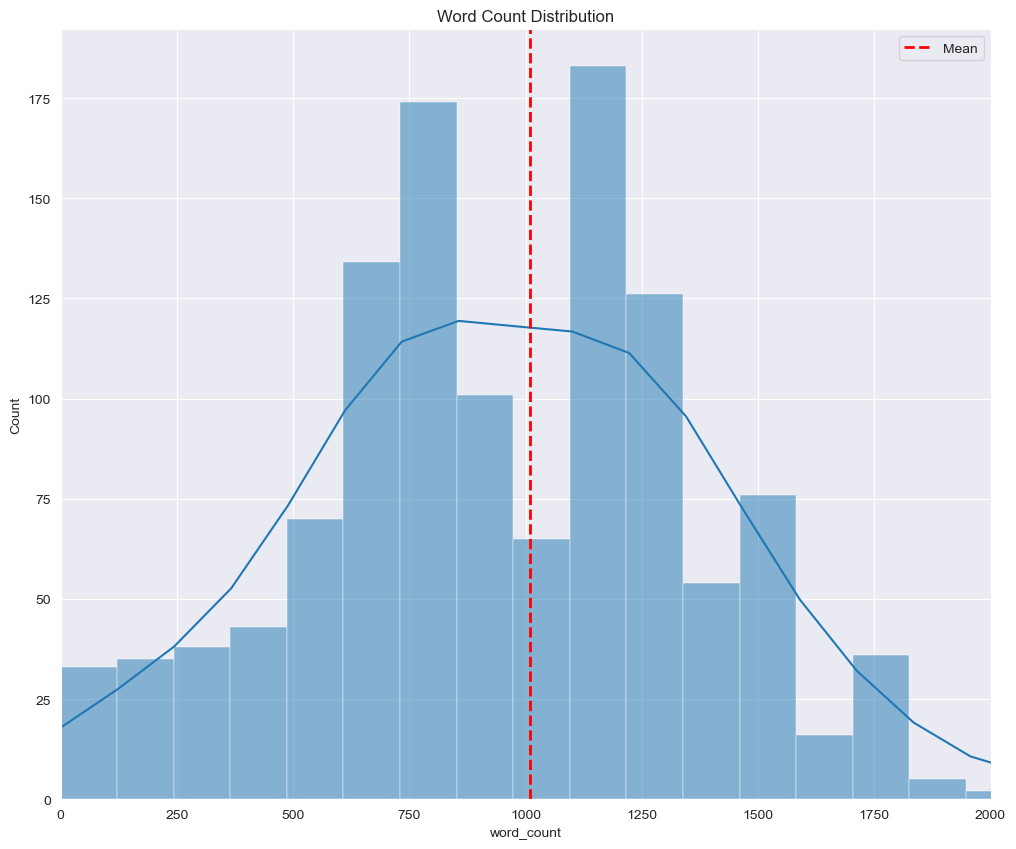

In [65]:
#word count; cut at 1000
plt.figure(figsize=(12, 10))
sns.histplot(df['word_count'], bins=200, kde=True)
plt.xlim(0, 2000)
#mean line
plt.axvline(df['word_count'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.legend()
plt.title('Word Count Distribution')
plt.show()

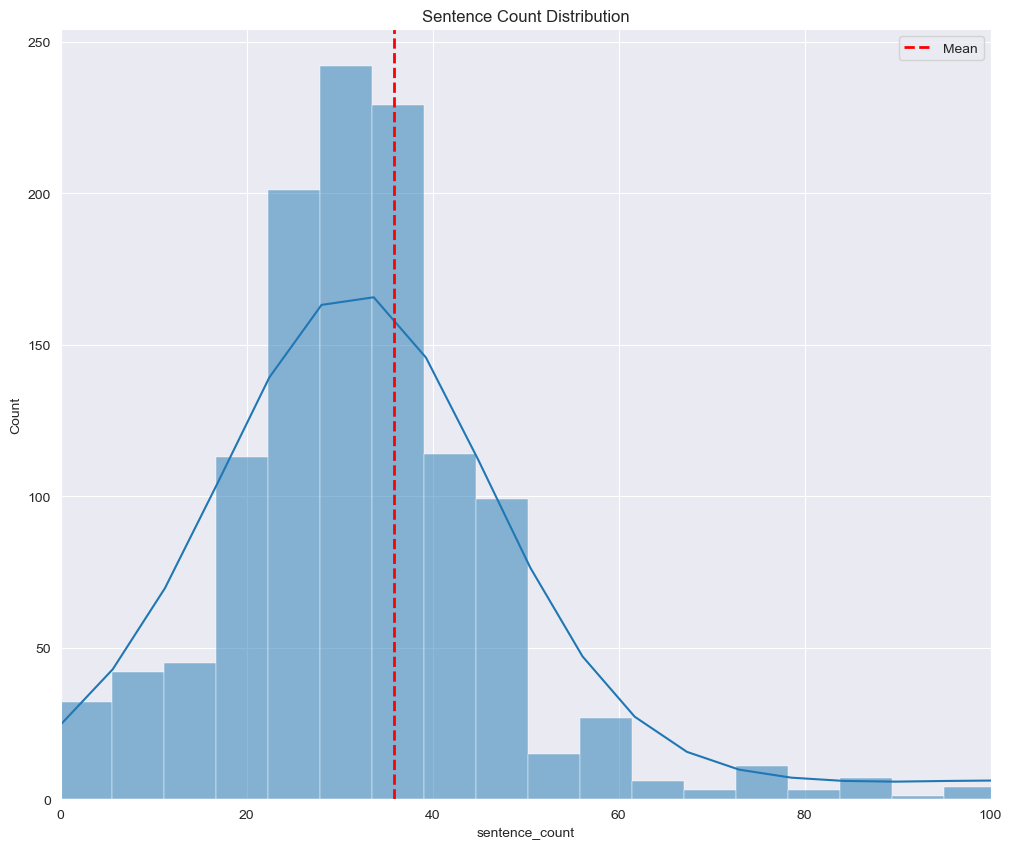

In [64]:
#sentence count; cut at 100
plt.figure(figsize=(12, 10))
sns.histplot(df['sentence_count'], bins=200, kde=True)
plt.xlim(0, 100)
#mean line
plt.axvline(df['sentence_count'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.legend()
plt.title('Sentence Count Distribution')
plt.show()


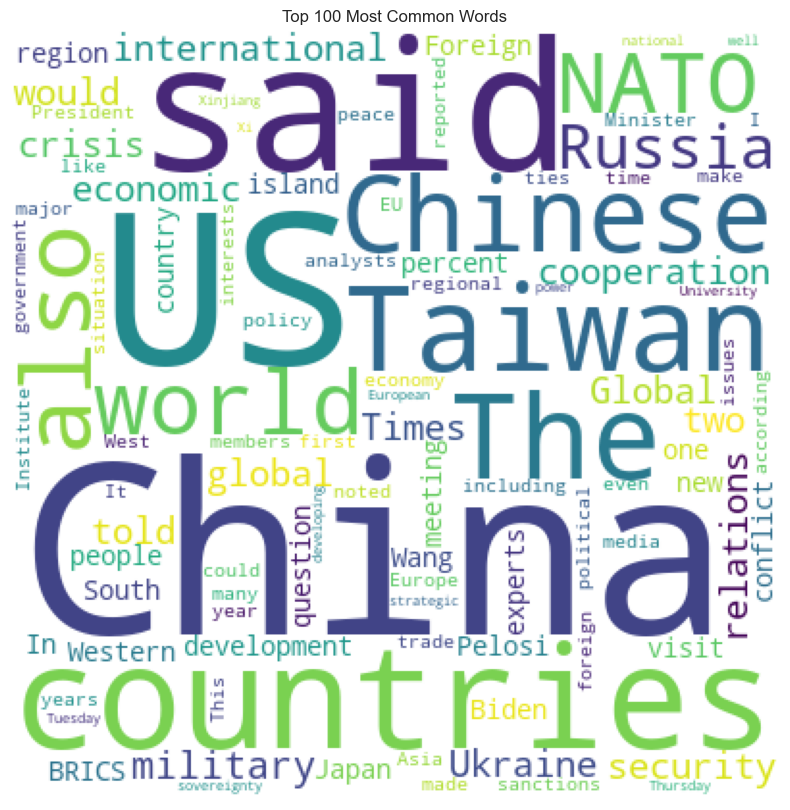

In [53]:
#wordcloud form freqdist
fdist = FreqDist([word for word in word_tokenize(' '.join(df['article_text'])) if word.isalpha() and word not in stop_words])
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(fdist.most_common(100)))
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words')
plt.show()

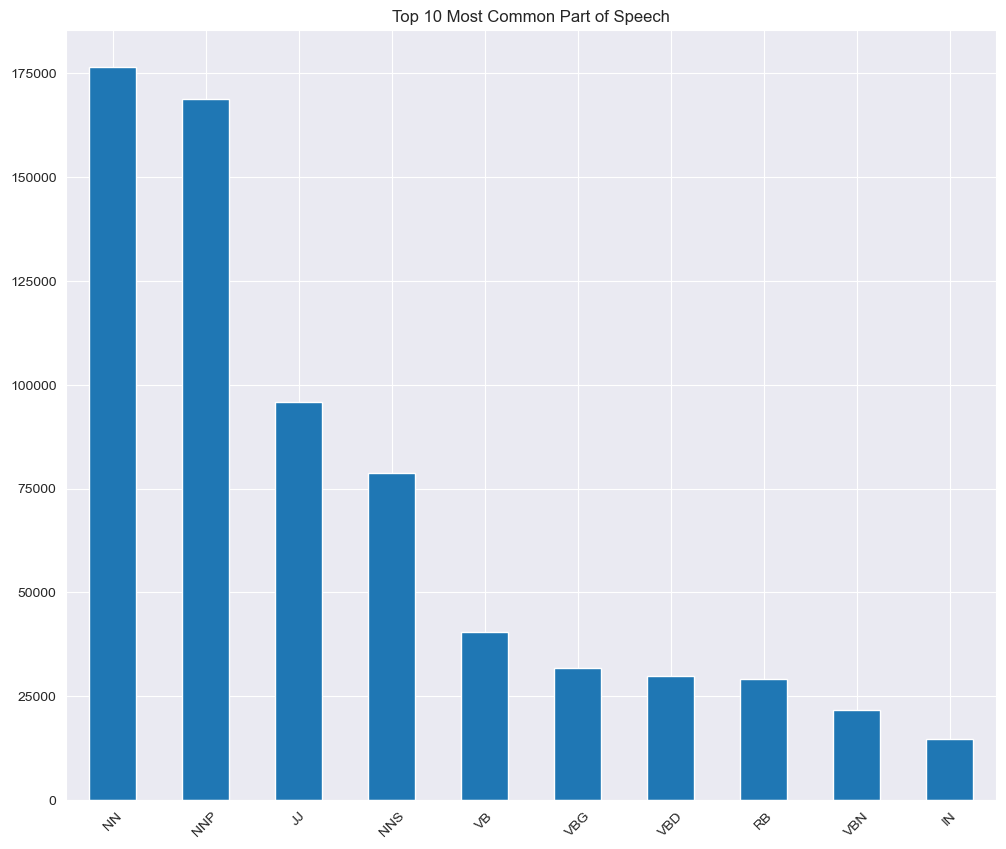

In [54]:
#top 10 most common part of speech
plt.figure(figsize=(12, 10))
df_pos.drop(columns=['sentence_count', 'word_count']).sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Most Common Part of Speech')
#turn x labels
plt.xticks(rotation=45)
plt.show()

### Total POS

In [55]:
NN = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text']))) if tag =="NN" and word.isalpha() and word not in stop_words])
NNP = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text']))) if tag =="NNP" and word.isalpha() and word not in stop_words])
JJ = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text']))) if tag =="JJ" and word.isalpha() and word not in stop_words])
NNS = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text']))) if tag =="NNS" and word.isalpha() and word not in stop_words])
VB = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text']))) if tag =="VB" and word.isalpha() and word not in stop_words])
RB = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text']))) if tag =="RB" and word.isalpha() and word not in stop_words])

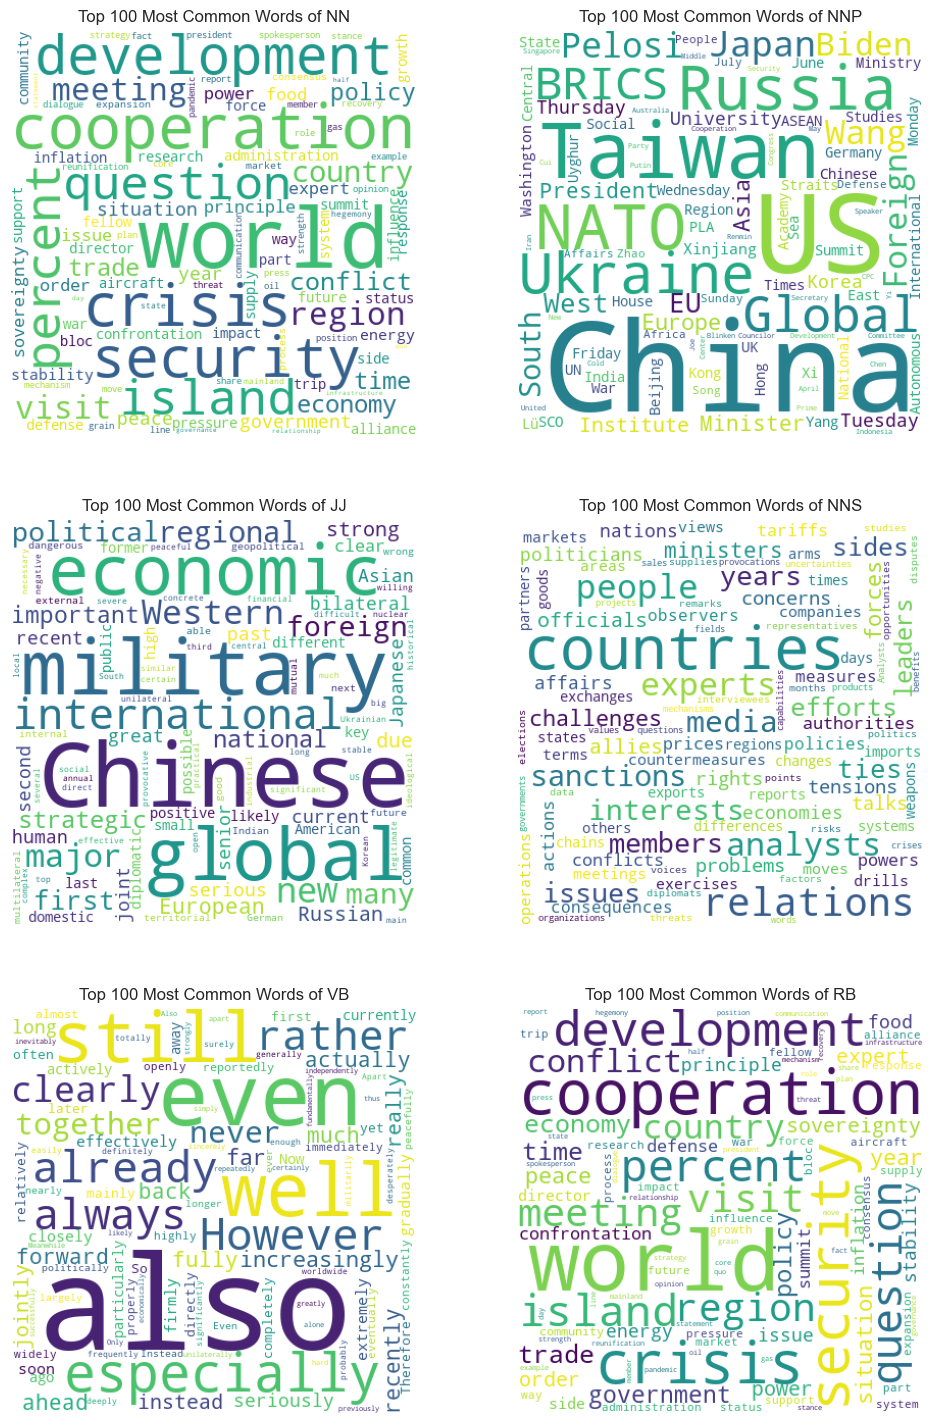

In [56]:
plt.figure(figsize=(12, 18))
plt.subplot(3, 2, 1)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NN.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NN')


plt.subplot(3, 2, 2)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NNP.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NNP')


plt.subplot(3, 2, 3)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(JJ.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of JJ')


plt.subplot(3, 2, 4)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NNS.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NNS')


plt.subplot(3, 2, 5)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(RB.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of VB')

plt.subplot(3, 2, 6)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NN.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of RB')


plt.show()


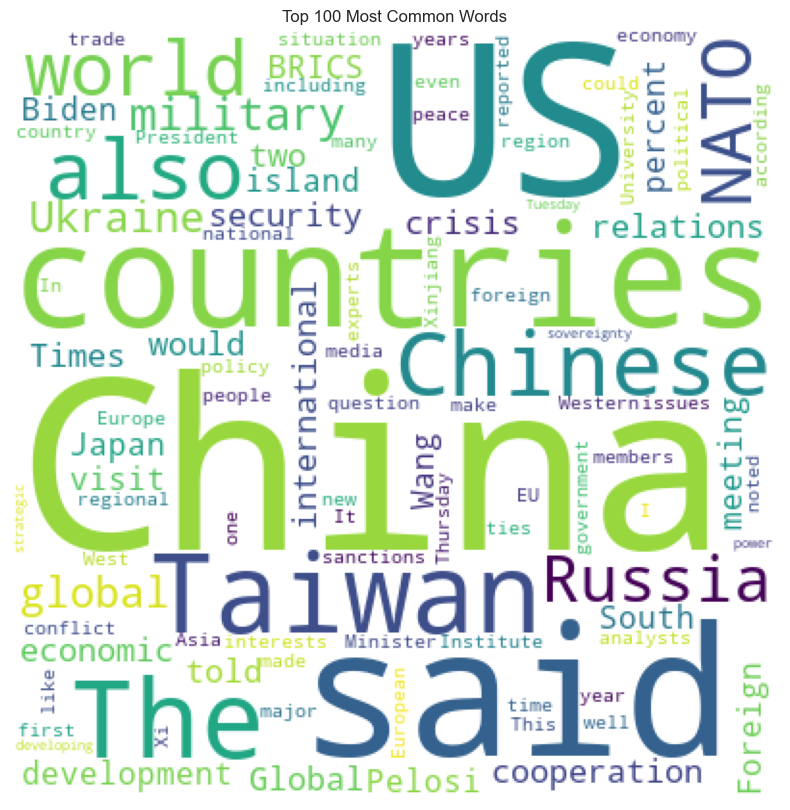

In [57]:
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(fdist.most_common(100)))
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words')
plt.show()

Text(0.5, 1.0, 'Article Categories')

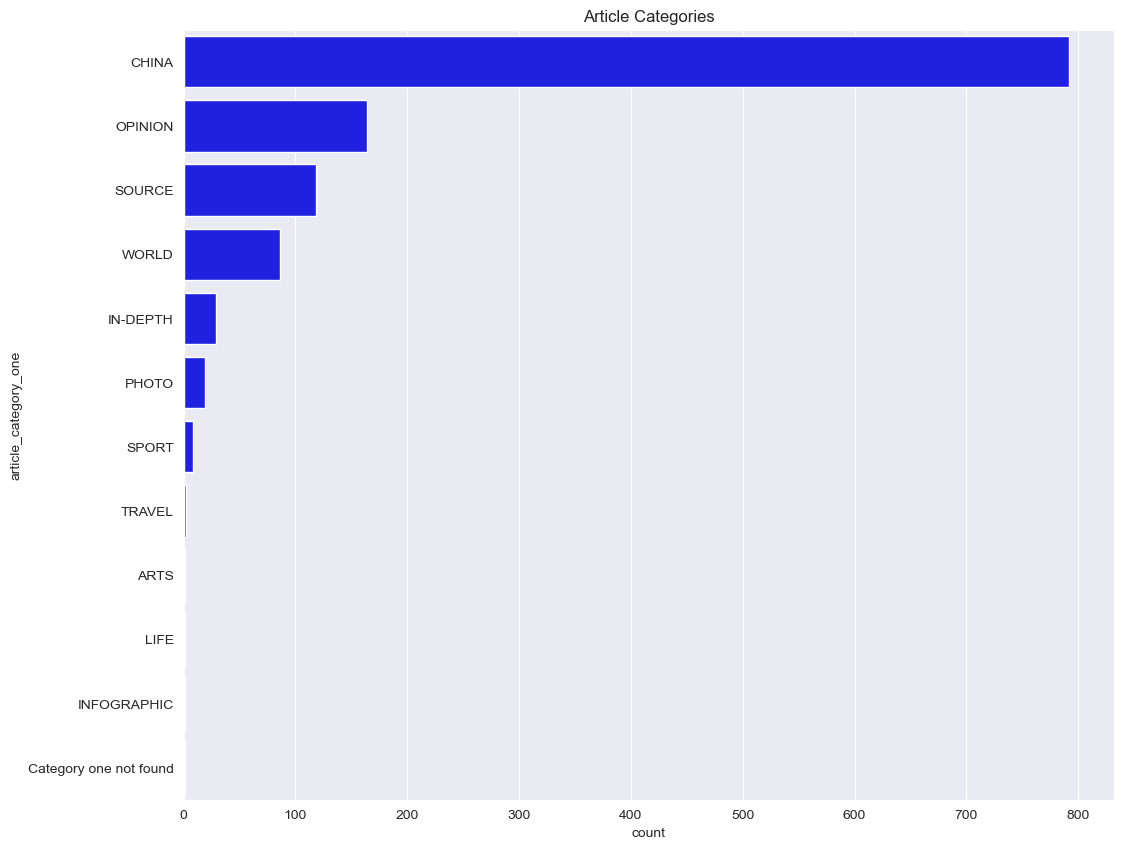

In [58]:
#sns countplot for article categories
plt.figure(figsize=(12, 10))
sns.countplot(y=df['article_category_one'], order=df['article_category_one'].value_counts().index, color='blue')
plt.title('Article Categories')


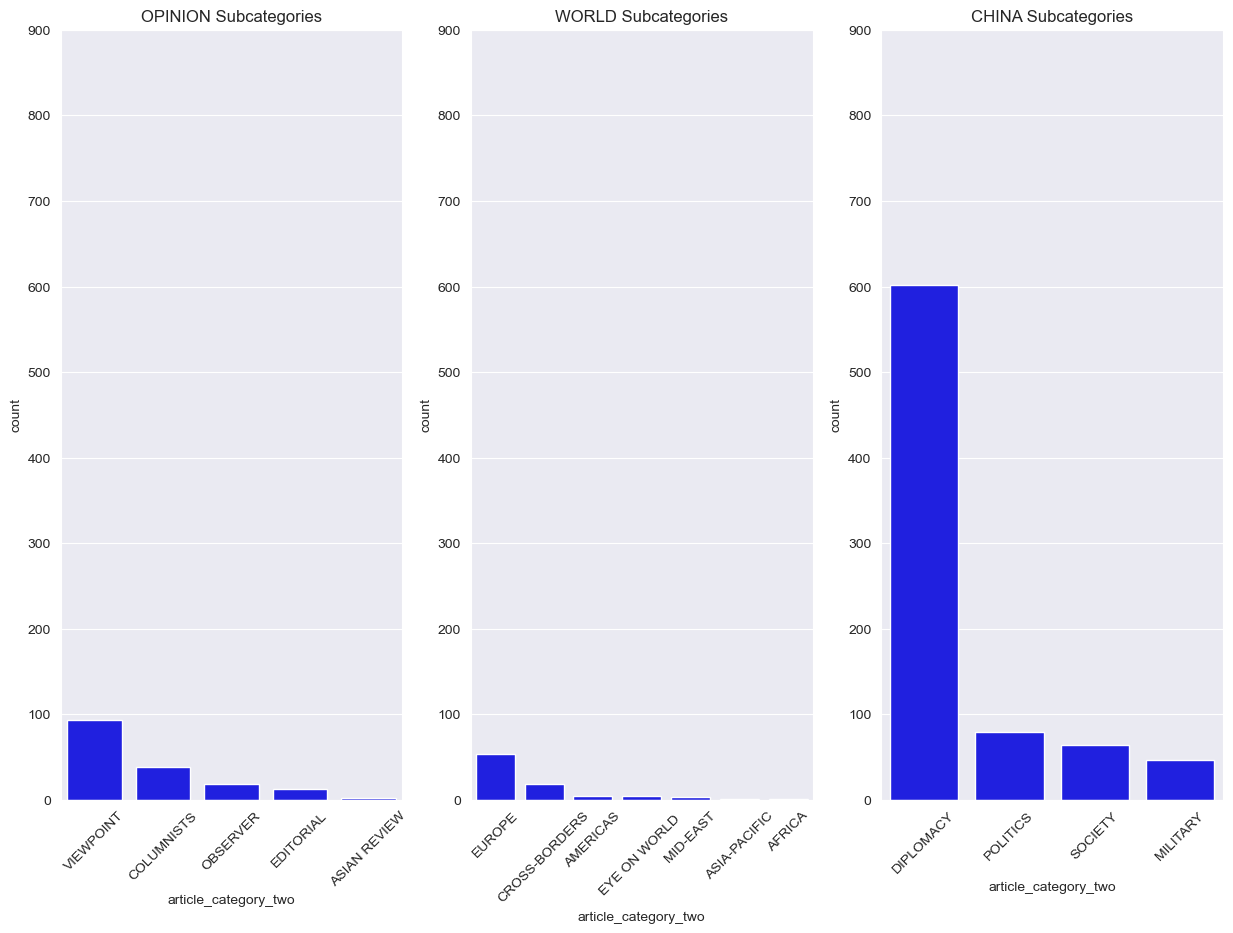

In [59]:
#plot for category one = opinion
#3 plots in a row
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
sns.countplot(x=df[df['article_category_one'] == 'OPINION']['article_category_two'],  color='blue', order=df[df['article_category_one'] == 'OPINION']['article_category_two'].value_counts().index )
plt.xticks(rotation=45)
plt.ylim(0, 900)
plt.title('OPINION Subcategories')

plt.subplot(1, 3, 2)
sns.countplot(x=df[df['article_category_one'] == 'WORLD']['article_category_two'],  color='blue', order=df[df['article_category_one'] == 'WORLD']['article_category_two'].value_counts().index)
plt.title('WORLD Subcategories')
plt.xticks(rotation=45)
plt.ylim(0, 900)

plt.subplot(1, 3, 3)
sns.countplot(x=df[df['article_category_one'] == 'CHINA']['article_category_two'],  color='blue', order=df[df['article_category_one'] == 'CHINA']['article_category_two'].value_counts().index)
plt.title('CHINA Subcategories')
plt.xticks(rotation=45)
plt.ylim(0, 900)
plt.show()


### POS: diplomacy vs columnists

In [60]:
NN = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'DIPLOMACY']))) if tag =="NN" and word.isalpha() and word not in stop_words])
NNP = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'DIPLOMACY']))) if tag =="NNP" and word.isalpha() and word not in stop_words])
JJ = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'DIPLOMACY']))) if tag =="JJ" and word.isalpha() and word not in stop_words])
NNS = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'DIPLOMACY']))) if tag =="NNS" and word.isalpha() and word not in stop_words])
VB = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'DIPLOMACY']))) if tag =="VB" and word.isalpha() and word not in stop_words])
RB = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'DIPLOMACY']))) if tag =="RB" and word.isalpha() and word not in stop_words])


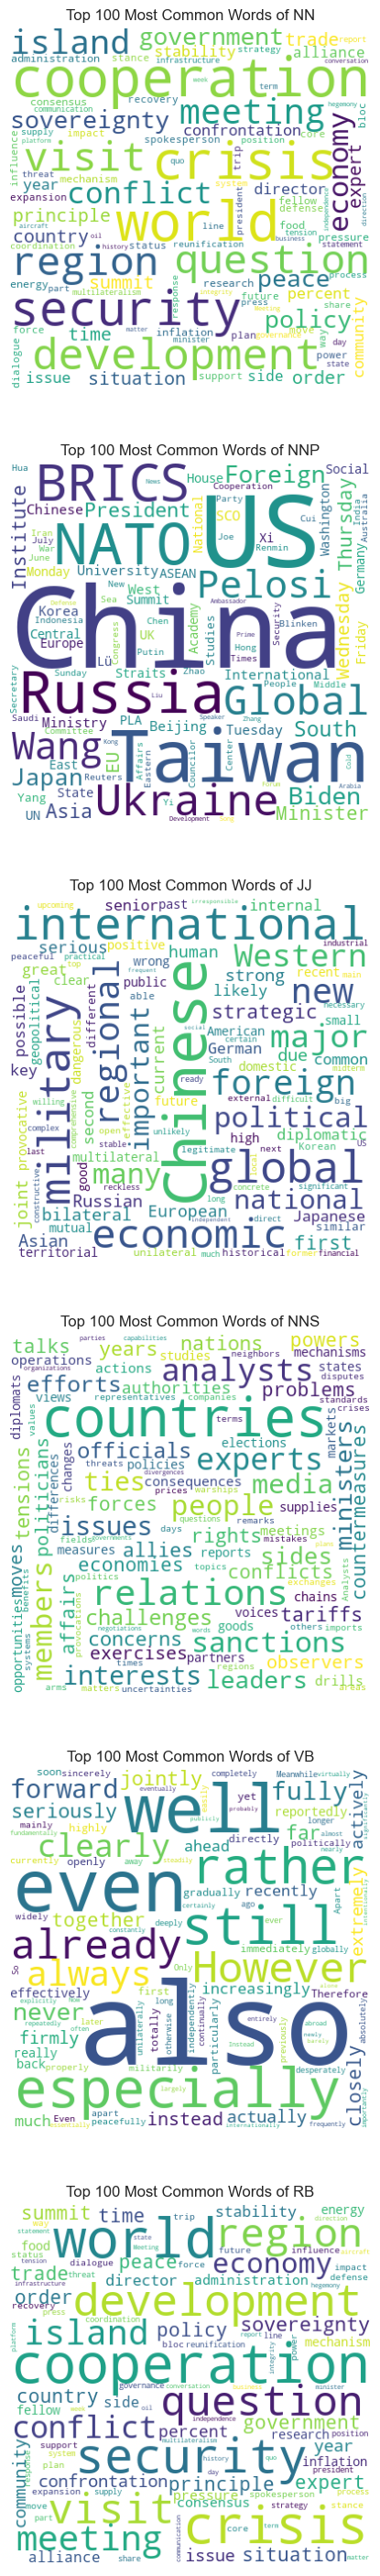

In [61]:
plt.figure(figsize=(6, 36))
plt.subplot(6, 1, 1)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NN.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NN')


plt.subplot(6, 1, 2)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NNP.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NNP')


plt.subplot(6, 1, 3)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(JJ.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of JJ')


plt.subplot(6, 1, 4)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NNS.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NNS')


plt.subplot(6, 1, 5)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(RB.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of VB')

plt.subplot(6, 1, 6)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NN.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of RB')


plt.show()


In [62]:
NN = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'COLUMNISTS']))) if tag =="NN" and word.isalpha() and word not in stop_words])
NNP = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'COLUMNISTS']))) if tag =="NNP" and word.isalpha() and word not in stop_words])
JJ = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'COLUMNISTS']))) if tag =="JJ" and word.isalpha() and word not in stop_words])
NNS = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'COLUMNISTS']))) if tag =="NNS" and word.isalpha() and word not in stop_words])
VB = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'COLUMNISTS']))) if tag =="VB" and word.isalpha() and word not in stop_words])
RB = FreqDist([word for word, tag in nltk.pos_tag(word_tokenize(' '.join(df['article_text'][df['article_category_two'] == 'COLUMNISTS']))) if tag =="RB" and word.isalpha() and word not in stop_words])


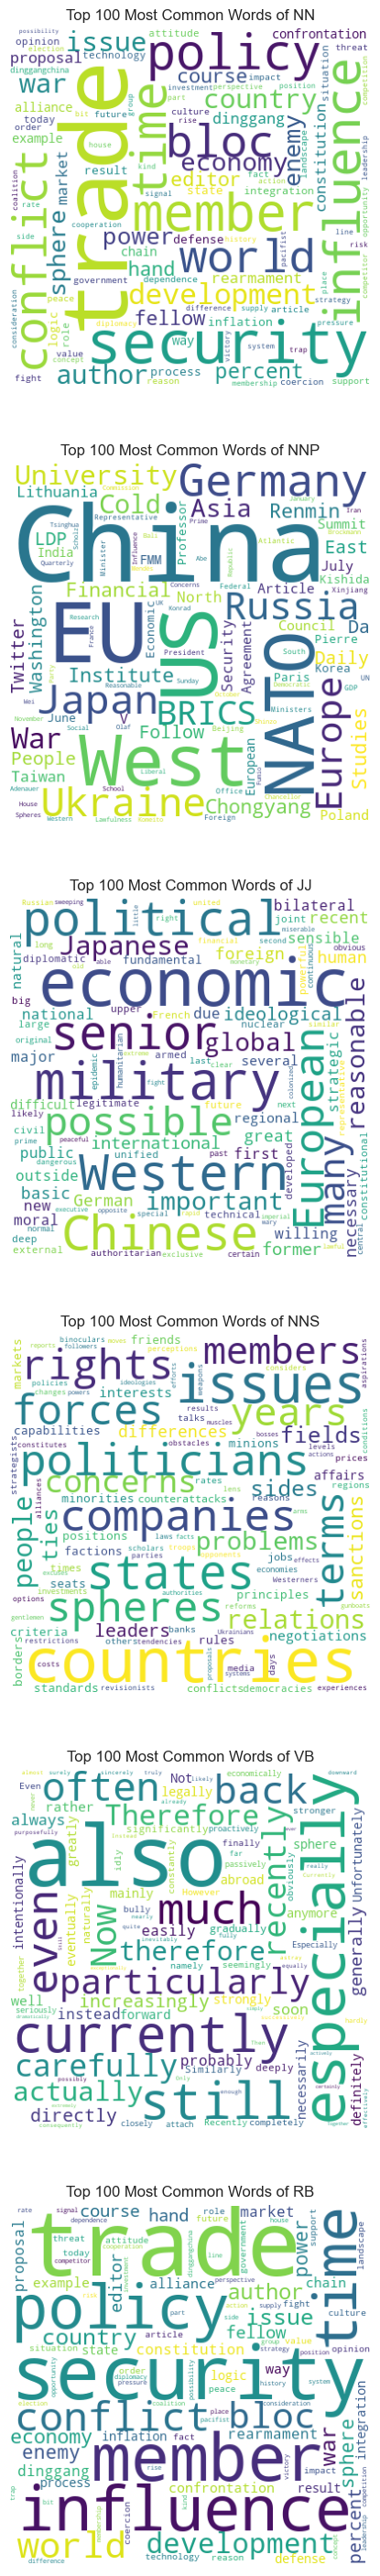

In [63]:
plt.figure(figsize=(6, 36))
plt.subplot(6, 1, 1)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NN.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NN')


plt.subplot(6, 1, 2)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NNP.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NNP')


plt.subplot(6, 1, 3)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(JJ.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of JJ')


plt.subplot(6, 1, 4)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NNS.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of NNS')


plt.subplot(6, 1, 5)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(RB.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of VB')

plt.subplot(6, 1, 6)
wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(dict(NN.most_common(100)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Top 100 Most Common Words of RB')


plt.show()
